In [5]:
import random as rd
import pandas as pd
import math

Variant = 4
rd.seed(Variant)

set_operations = ['-','+','*','/']
set_operands = ['a', 'b', 'c']
count_operations = rd.randint(3,5)

expression = set_operands[rd.randint(0,len(set_operands)-1)]
for i in range(count_operations):
    current_operation = set_operations[rd.randint(0,len(set_operations)-1)]
    current_operand = set_operands[rd.randint(0,len(set_operands)-1)]
    expression = "(" + expression + current_operation + current_operand + ")"
expression

'(((b-c)/b)+a)'

Задание 1

In [ ]:
format ELF64

public _start

section '.bss' writable
  buffer db 1

section '.text' executable
print_symbol:
    xor rbx, rbx

    cmp rax, 9
    jle .one_symbol

    mov rcx, 10
.loop:
    xor rdx, rdx
    div rcx
    push rdx
    inc rbx
    test rax, rax
    jnz .loop

.print:
    pop rax
    add rax, '0'
    mov [buffer], al

    mov eax, 1
    mov edi, 1
    mov rsi, buffer
    mov edx, 1
    syscall

    dec rbx
    jnz .print

    ret

.one_symbol:
    add rax, '0'
    mov [buffer], al

    mov eax, 1
    mov edi, 1
    mov rsi, buffer
    mov edx, 1
    syscall
    ret

_start:
    pop rcx
    cmp rcx, 2
    jl .exit

    mov rsi, [rsp + 8]
    movzx rax, byte [rsi]
    call print_symbol

.exit:
    mov eax, 60
    xor edi, edi
    syscall

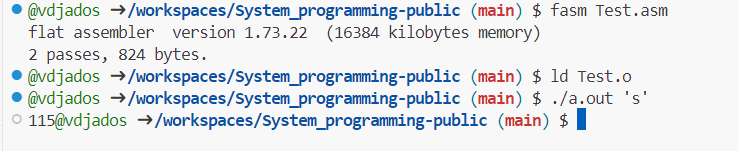

In [ ]:
format ELF64

public _start

section '.bss' writable
    place db 1
    result db 20          

section '.text' executable

str_num:
    push rcx
    push rbx

    xor rax, rax            
    xor rcx, rcx             
.loop:
    xor rbx, rbx             
    mov bl, byte [rsi + rcx]
    cmp bl, 48              
    jl .finished
    cmp bl, 57               
    jg .finished

    sub bl, 48             
    add rax, rbx           
    mov rbx, 10            
    mul rbx
    inc rcx                  
    jmp .loop

.finished:
    cmp rcx, 0             
    je .restore            

    mov rbx, 10
    div rbx                

.restore:
    pop rbx
    pop rcx
    ret

print_d:
    xor rbx, rbx           

    cmp rax, 9
    jle .single_digit        

    mov rcx, 10            
.loop:
    xor rdx, rdx            
    div rcx                
    push rdx                
    inc rbx                 
    test rax, rax           
    jnz .loop               

.print_loop:
    pop rax                
    add rax, '0'            
    mov [place], al         

    mov eax, 1              
    mov edi, 1              
    mov rsi, place          
    mov edx, 1           
    syscall

    dec rbx                 
    jnz .print_loop         

    ret

.single_digit:
    add rax, '0'           
    mov [place], al        

    mov eax, 1              
    mov edi, 1              
    mov rsi, place          
    mov edx, 1              
    syscall
    ret

_start:
    pop rcx
    cmp rcx, 4              
    jne .no_arg             

    mov rsi, [rsp + 8]      
    call str_num     
    mov rbx, rax             

    mov rsi, [rsp + 16]     
    call str_num        
    mov rcx, rax           

    mov rsi, [rsp + 24]     
    call str_num    
    mov rdx, rax            

    mov rax, rcx            
    sub rax, rdx  
    xor rdx, rdx            
    div rcx
    add rax, rbx           

    call print_d

    mov eax, 60             
    xor edi, edi           
    syscall

.no_arg:
    mov eax, 60             
    xor edi, edi            
    syscall

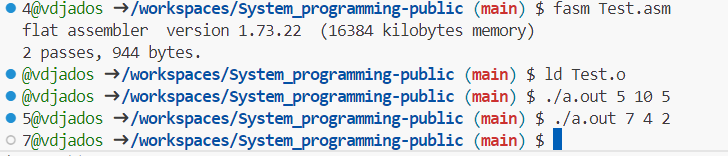

Задание 3

In [ ]:
# include <stdio.h>
# include <stdlib.h>

int main(int argc, char *argv[]) {
    if(argc==4){
        int a = atoi(argv[1]);
        int b = atoi(argv[2]);
        int c = atoi(argv[3]);
        int result = ((b-c)/ b) + a;
        printf("%d\n", result);
    }else{
        printf("wrong args");
    }
    return 0;
}

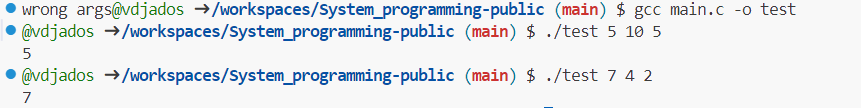